In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
le = LabelEncoder()

df["species"] = le.fit_transform(df["species"])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<function matplotlib.pyplot.show(close=None, block=None)>

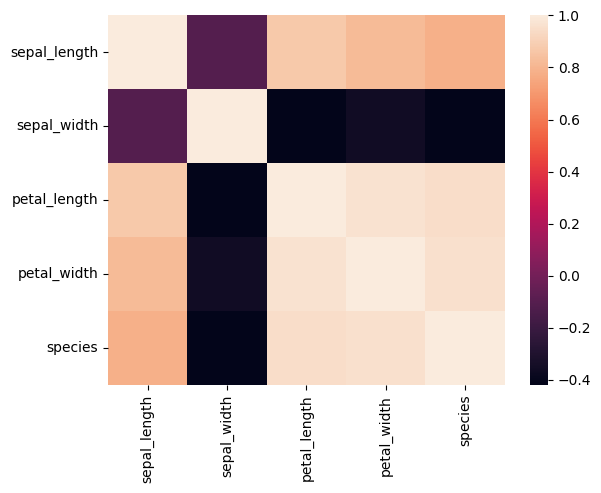

In [9]:
df5 = df.corr()
sns.heatmap(df5 , annot =False)
plt.show

In [10]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

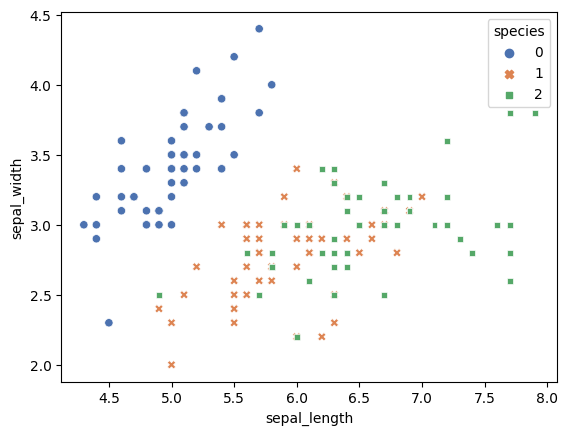

In [11]:
sns.scatterplot(df,x="sepal_length", y="sepal_width", hue="species",style ="species",palette="deep")
plt.show()

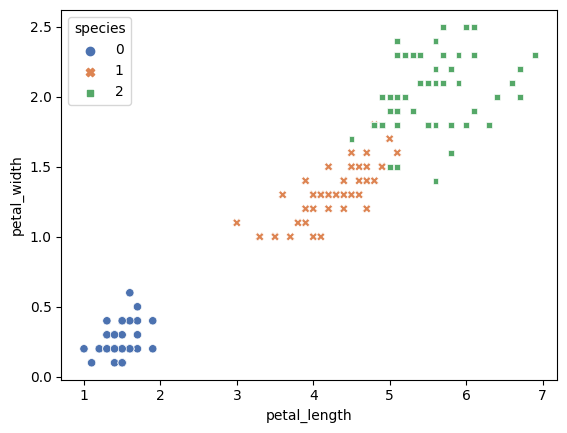

In [12]:
sns.scatterplot(df,x="petal_length", y="petal_width", hue="species",style ="species",palette="deep")
plt.show()

Train-Test Split

In [13]:
X = df.drop(["species"],axis =1)
y = df["species"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2)

Support Vctor is used for this calssification Problem

In [14]:
model = SVC(kernel='linear') 
model.fit(X, y)

SVC(kernel='linear')

In [15]:
model.predict(X_test)

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 2])

In [16]:
acc1 = model.score(X_test,y_test)

In [17]:
acc_svm = round(acc1 * 100, 2)
acc_svm

100.0

K-Nearest Neighbour is used for this classification problem

In [18]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
model.predict(X_test)

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 2])

In [20]:
acc2 = model.score(X_test,y_test)

In [21]:
acc_knn = round(acc2 * 100, 2)
acc_knn

96.67

Linear Regression is used for this classification problem

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.predict(X_test)

array([ 1.71770629e+00, -4.47280310e-02, -3.42327028e-03, -1.18225549e-01,
        1.92811864e-01, -2.92518190e-03, -6.90541178e-03,  1.33958113e+00,
        2.02478177e+00,  1.96647222e+00,  1.54411467e+00,  1.28047837e+00,
        1.45084276e+00,  1.58523451e+00,  9.90067342e-01,  1.72591902e+00,
        8.41997275e-01,  2.06876603e+00,  6.97631689e-02, -9.11893883e-02,
        2.07769102e+00,  1.69529495e+00, -7.84939082e-02,  9.84126402e-01,
        1.20823846e+00,  1.16488731e+00,  1.31220229e+00,  1.35383422e-04,
        8.65794723e-01,  1.66074473e+00])

In [24]:
acc3 = model.score(X_test,y_test)

In [25]:
acc_lir = round(acc3 * 100 , 2)
acc_lir

92.68

Logistic Regression is used for this classification problem

In [26]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [27]:
model.predict(X_test)

array([2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 2])

In [28]:
acc4 = model.score(X_test,y_test)

In [30]:
acc_lr = round(acc4 * 100 , 2)
acc_lr

96.67

Decision Tree is used in this classification problem

In [31]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
acc5 = model.score(X_train,y_train)

In [33]:
acc_decisionTree = round( acc4 * 100 , 2)
acc_decisionTree

96.67

In [34]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 2.60
|   |--- class: 0
|--- feature_2 >  2.60
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



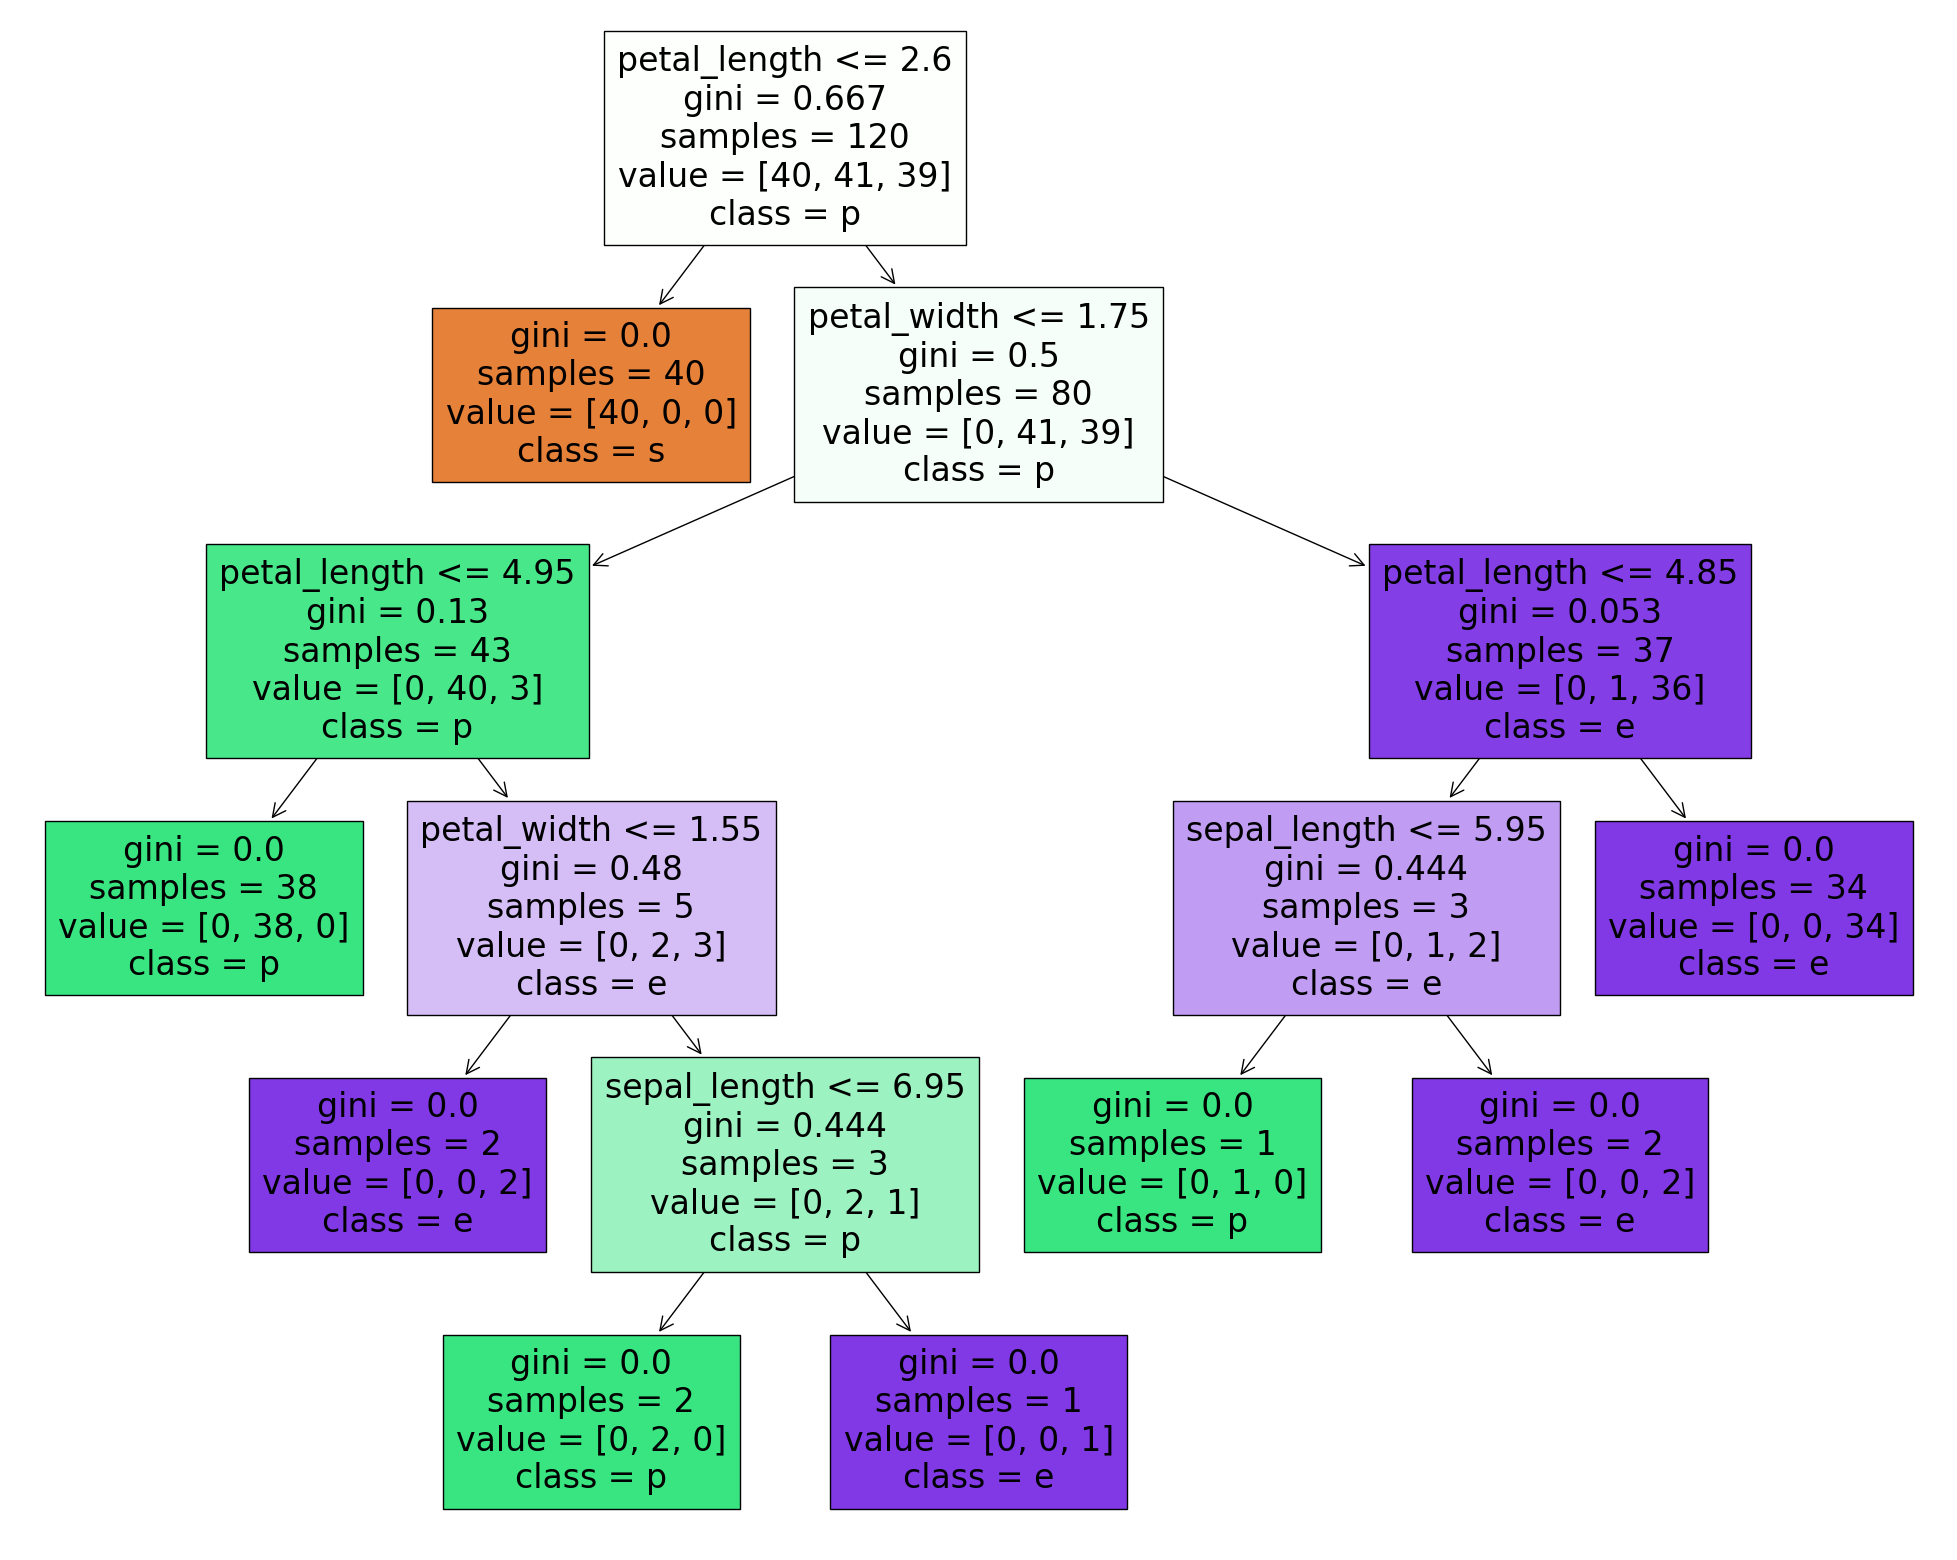

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
                   class_names = "species",
                   filled=True)

In [36]:
model = pd.DataFrame({
    'Model': ['Support Vector Machines','KNN','Linear Regression','Logistic Regression','Decision Tree'],
    'Score': [acc_svm, acc_knn, acc_lir, acc_lr, acc_decisionTree ]
                     }
                    )
model.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,100.00
1,KNN,96.67
3,Logistic Regression,96.67
4,Decision Tree,96.67
2,Linear Regression,92.68
